#  Trần Xuân Triển - B20DCCN691  - 04 - 01

In [6]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tạo danh sách để lưu hình ảnh, nhãn và tên file
data = []
labels = []

# Đường dẫn đến thư mục chứa hình ảnh
root_folder = "C:/Users/Admin/Desktop/PTHTTM/Test"

for label in ["Tuong tu","That tinh", "Dang yeu"]:
    label_folder = os.path.join(root_folder, label)
    
    if os.path.isdir(label_folder):  # Kiểm tra thư mục tồn tại
        for filename in os.listdir(label_folder):
            try:
                if filename.endswith(".jpg") or filename.endswith(".PNG"):
                    image_path = os.path.join(label_folder, filename)  # Đường dẫn đến ảnh

                    # Đọc hình ảnh bằng OpenCV
                    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    # Đảm bảo rằng hình ảnh có kích thước ít nhất 64x64
                    img = cv2.resize(img, (64, 64))
                    # Đảm bảo rằng hình ảnh có 3 kênh màu (RGB)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Chuyển đổi ảnh thành mảng NumPy
                    img_array = np.array(img)

                    data.append(img_array)
                    labels.append(label)

                    # Hiển thị ma trận NumPy dưới dạng ảnh
                    #plt.imshow(img_array)
                    #plt.show()
            except:
                pass
# Chuyển danh sách thành mảng NumPy
data = np.array(data)
labels = np.array(labels)

# Tạo DataFrame pandas với hình ảnh, nhãn
df = pd.DataFrame({'Image': data.tolist(), 'Label': labels})

# Lưu DataFrame vào tệp CSV
df.to_csv('Test.csv', index=False)
print(df.shape)

(201, 2)


In [5]:
import pandas as pd

df = pd.read_csv('Test.csv')
print(df.head())

                                               Image     Label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  Tuong tu
1  [[[206, 214, 216], [209, 214, 217], [210, 214,...  Tuong tu
2  [[[130, 118, 118], [129, 116, 110], [89, 80, 7...  Tuong tu
3  [[[195, 204, 211], [201, 210, 217], [206, 213,...  Tuong tu
4  [[[27, 21, 33], [27, 21, 33], [28, 22, 34], [2...  Tuong tu


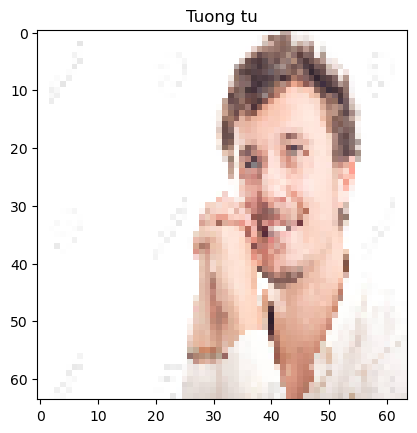

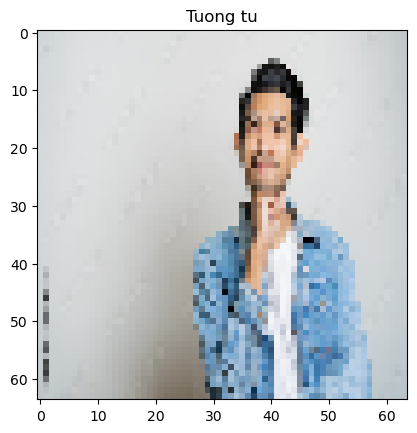

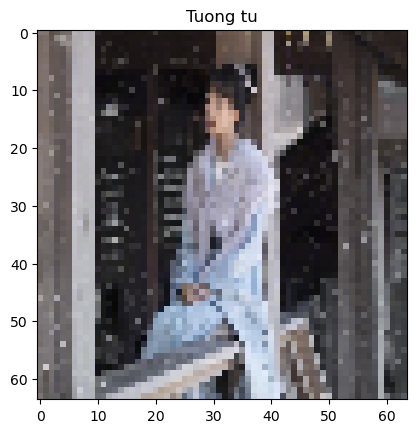

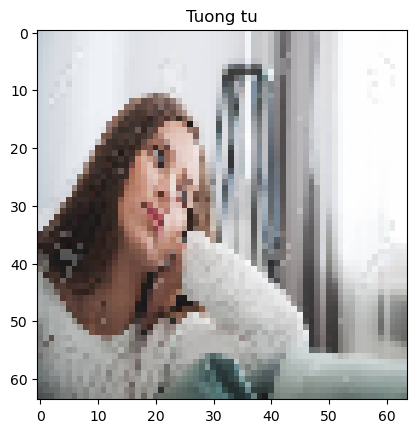

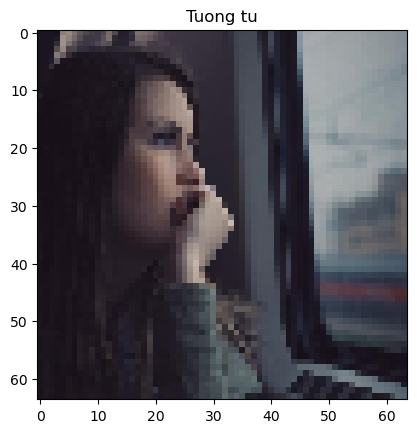

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast  

# Đọc tệp CSV
df = pd.read_csv('Test.csv')

# Lấy 5 dòng đầu tiên từ DataFrame
first_5_rows = df.head(5)

# Lặp qua từng dòng và hiển thị hình ảnh
for index, row in first_5_rows.iterrows():
    image_data = row['Image']
    label = row['Label']

    # Chuyển chuỗi số thành mảng NumPy
    image_data = np.array(ast.literal_eval(image_data))

    # Hiển thị hình ảnh
    plt.imshow(image_data)
    plt.title(label)
    plt.show()


# model 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd

# Đọc tệp CSV
df = pd.read_csv('Test.csv')

# Chuyển đổi dữ liệu hình ảnh từ chuỗi thành mảng NumPy
data = df['Image'].apply(lambda x: np.array(eval(x))).values
labels = df['Label'].values

# Kết hợp tất cả các mảng hình ảnh thành một tensor
X_data = np.stack(data, axis=0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=42)

# Chuyển đổi dữ liệu hình ảnh thành tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Chia tỷ lệ giá trị pixel vào khoảng [0, 1]
X_train /= 255.0
X_test /= 255.0

# Mã hóa one hot cho nhãn
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size = 64,  validation_data=(X_test, y_test_one_hot))

Epoch 1/100
3/3 [==============================] - 3s 572ms/step - loss: 1.7222 - accuracy: 0.3875 - val_loss: 1.1088 - val_accuracy: 0.4390
Epoch 2/100
3/3 [==============================] - 1s 362ms/step - loss: 1.1051 - accuracy: 0.3438 - val_loss: 1.0769 - val_accuracy: 0.4390
Epoch 3/100
3/3 [==============================] - 1s 381ms/step - loss: 1.0729 - accuracy: 0.4563 - val_loss: 0.9898 - val_accuracy: 0.4390
Epoch 4/100
3/3 [==============================] - 1s 368ms/step - loss: 1.1086 - accuracy: 0.4250 - val_loss: 1.0288 - val_accuracy: 0.4390
Epoch 5/100
3/3 [==============================] - 1s 401ms/step - loss: 1.0572 - accuracy: 0.4250 - val_loss: 1.0493 - val_accuracy: 0.4390
Epoch 6/100
3/3 [==============================] - 1s 404ms/step - loss: 1.0660 - accuracy: 0.5188 - val_loss: 1.0140 - val_accuracy: 0.6341
Epoch 7/100
3/3 [==============================] - 1s 449ms/step - loss: 1.0453 - accuracy: 0.5188 - val_loss: 1.0038 - val_accuracy: 0.4390
Epoch 8/100
3

Epoch 59/100
3/3 [==============================] - 1s 437ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 4.3048 - val_accuracy: 0.3659
Epoch 60/100
3/3 [==============================] - 1s 429ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 4.2585 - val_accuracy: 0.3659
Epoch 61/100
3/3 [==============================] - 1s 502ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 4.3831 - val_accuracy: 0.3659
Epoch 62/100
3/3 [==============================] - 2s 556ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 4.6403 - val_accuracy: 0.3659
Epoch 63/100
3/3 [==============================] - 1s 493ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 4.8127 - val_accuracy: 0.3902
Epoch 64/100
3/3 [==============================] - 1s 423ms/step - loss: 0.0235 - accuracy: 0.9937 - val_loss: 4.7766 - val_accuracy: 0.3659
Epoch 65/100
3/3 [==============================] - 1s 383ms/step - loss: 0.0299 - accuracy: 0.9875 - val_loss: 4.4934 - val_accuracy: 0.4146
Epoch 

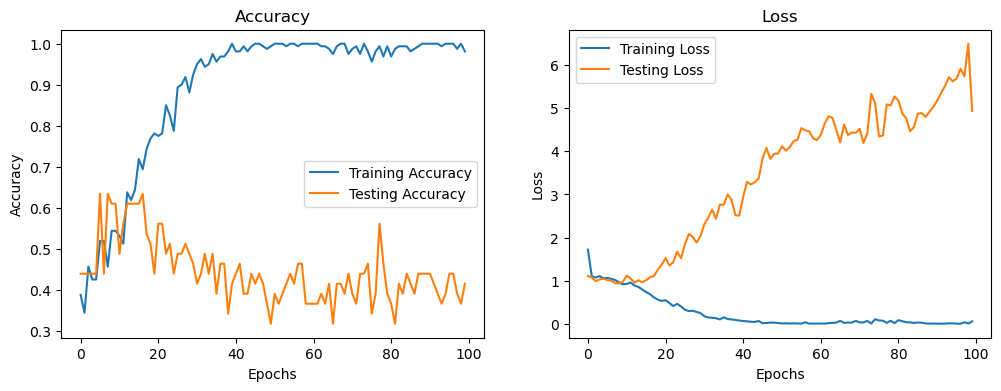

2/2 [==============================] - 0s 32ms/step - loss: 4.9378 - accuracy: 0.4146
Test Accuracy: 41.46%


In [2]:
import matplotlib.pyplot as plt

# Lấy giá trị accuracy và loss từ biến "history"
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Vẽ biểu đồ

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 114ms/step


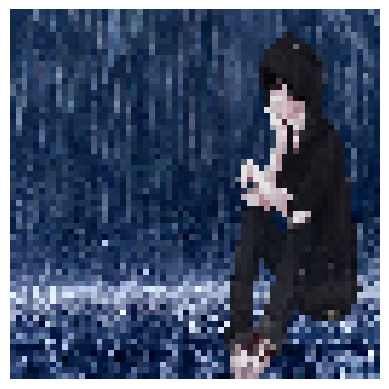

Tuong tu: 0.03%
That tinh: 99.97%
Dang yeu: 0.00%
Predicted class: That tinh


In [3]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh từ máy tính
image_path = "C:/Users/Admin/Pictures/demo1.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (64, 64))
preprocessed_image = resized_image / 255.0

# Chuyển đổi ảnh thành tensor
input_image = tf.convert_to_tensor(preprocessed_image, dtype=tf.float32)

# Dự đoán bằng mô hình đã huấn luyện
predictions = model.predict(tf.expand_dims(input_image, axis=0))

# Đưa ra kết quả
class_labels = ["Tuong tu", "That tinh", "Dang yeu"]
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Hiển thị ma trận ảnh
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Chuyển đổi màu từ BGR sang RGB
plt.axis('off')  # Ẩn trục
plt.show()

# Hiển thị xác suất cho từng nhãn
for i in range(len(class_labels)):
    probability = predictions[0][i] * 100
    print(f"{class_labels[i]}: {probability:.2f}%")

print(f"Predicted class: {predicted_class_label}")

# model 2

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd

# Đọc tệp CSV
df = pd.read_csv('Test.csv')

# Chuyển đổi dữ liệu hình ảnh từ chuỗi thành mảng NumPy
data = df['Image'].apply(lambda x: np.array(eval(x))).values
labels = df['Label'].values

# Kết hợp tất cả các mảng hình ảnh thành một tensor
X_data = np.stack(data, axis=0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=32)

# Chuyển đổi dữ liệu hình ảnh thành tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Chia tỷ lệ giá trị pixel vào khoảng [0, 1]
X_train /= 255.0
X_test /= 255.0

# Mã hóa one hot cho nhãn
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train_one_hot, epochs=200, batch_size = 32, validation_data=(X_test, y_test_one_hot))

Epoch 1/200
5/5 [==============================] - 2s 233ms/step - loss: 1.3642 - accuracy: 0.3750 - val_loss: 1.0411 - val_accuracy: 0.4878
Epoch 2/200
5/5 [==============================] - 1s 197ms/step - loss: 1.0743 - accuracy: 0.4125 - val_loss: 1.0382 - val_accuracy: 0.5366
Epoch 3/200
5/5 [==============================] - 1s 198ms/step - loss: 0.9963 - accuracy: 0.5500 - val_loss: 0.9517 - val_accuracy: 0.5366
Epoch 4/200
5/5 [==============================] - 1s 197ms/step - loss: 0.8911 - accuracy: 0.5688 - val_loss: 1.0210 - val_accuracy: 0.5854
Epoch 5/200
5/5 [==============================] - 1s 195ms/step - loss: 0.8304 - accuracy: 0.6250 - val_loss: 0.9181 - val_accuracy: 0.5854
Epoch 6/200
5/5 [==============================] - 1s 198ms/step - loss: 0.6892 - accuracy: 0.7375 - val_loss: 1.0185 - val_accuracy: 0.5854
Epoch 7/200
5/5 [==============================] - 1s 202ms/step - loss: 0.5515 - accuracy: 0.8062 - val_loss: 0.9683 - val_accuracy: 0.5366
Epoch 8/200
5

5/5 [==============================] - 1s 269ms/step - loss: 9.3467e-04 - accuracy: 1.0000 - val_loss: 4.4353 - val_accuracy: 0.4390
Epoch 116/200
5/5 [==============================] - 1s 278ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.5343 - val_accuracy: 0.4390
Epoch 117/200
5/5 [==============================] - 1s 283ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.5329 - val_accuracy: 0.4878
Epoch 118/200
5/5 [==============================] - 1s 288ms/step - loss: 9.2005e-04 - accuracy: 1.0000 - val_loss: 4.5058 - val_accuracy: 0.5122
Epoch 119/200
5/5 [==============================] - 1s 264ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.4142 - val_accuracy: 0.4878
Epoch 120/200
5/5 [==============================] - 1s 269ms/step - loss: 2.1689e-04 - accuracy: 1.0000 - val_loss: 4.3943 - val_accuracy: 0.4634
Epoch 121/200
5/5 [==============================] - 1s 266ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.4364 - val_accuracy: 0.4878
E

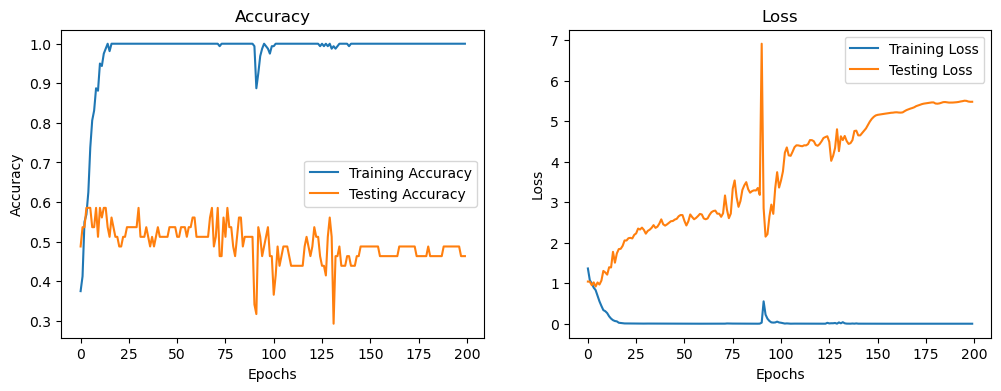

2/2 [==============================] - 0s 29ms/step - loss: 5.4809 - accuracy: 0.4634
Test Accuracy: 46.34%


In [13]:
import matplotlib.pyplot as plt

# Lấy giá trị accuracy và loss từ biến "history"
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']


# Vẽ biểu đồ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
        

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 67ms/step


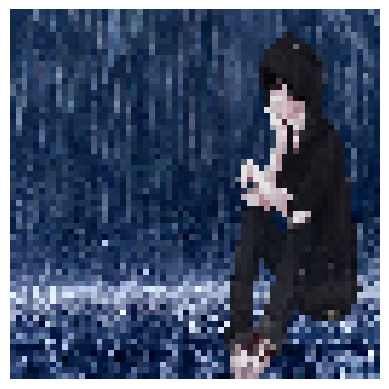

Tuong tu: 71.62%
That tinh: 25.93%
Dang yeu: 2.44%
Predicted class: Tuong tu


In [6]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh từ máy tính
image_path = "C:/Users/Admin/Pictures/demo1.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (64, 64))
preprocessed_image = resized_image / 255.0

# Chuyển đổi ảnh thành tensor
input_image = tf.convert_to_tensor(preprocessed_image, dtype=tf.float32)

# Dự đoán bằng mô hình đã huấn luyện
predictions = model.predict(tf.expand_dims(input_image, axis=0))

# Đưa ra kết quả
class_labels = ["Tuong tu", "That tinh", "Dang yeu"]
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Hiển thị ma trận ảnh
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Chuyển đổi màu từ BGR sang RGB
plt.axis('off')  # Ẩn trục
plt.show()

# Hiển thị xác suất cho từng nhãn
for i in range(len(class_labels)):
    probability = predictions[0][i] * 100
    print(f"{class_labels[i]}: {probability:.2f}%")

print(f"Predicted class: {predicted_class_label}")

# model 3

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đọc tệp CSV
df = pd.read_csv('Test.csv')

# Chuyển đổi dữ liệu hình ảnh từ chuỗi thành mảng NumPy
data = df['Image'].apply(lambda x: np.array(eval(x))).values
labels = df['Label'].values

# Kết hợp tất cả các mảng hình ảnh thành một tensor
X_data = np.stack(data, axis=0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=32)

# Chuyển đổi dữ liệu hình ảnh thành tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Chia tỷ lệ giá trị pixel vào khoảng [0, 1]
X_train /= 255.0
X_test /= 255.0

# Mã hóa one hot cho nhãn
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Giảm dropout để giảm khả năng overfitting
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),  # Thêm một lớp Dense nữa
    layers.Dense(3, activation='softmax')
])

# Thêm một lớp đệm trước lớp convolutional thứ tư
model.add(layers.Padding(padding=(1, 1)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Tạo đối tượng ImageDataGenerator để thực hiện data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit đối tượng datagen vào dữ liệu huấn luyện
datagen.fit(X_train)

# Huấn luyện mô hình với dữ liệu đã được tăng cường
history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=150, validation_data=(X_test, y_test_one_hot))


ValueError: Exception encountered when calling layer "conv2d_27" (type Conv2D).

Negative dimension size caused by subtracting 5 from 4 for '{{node conv2d_27/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_27/Conv2D/ReadVariableOp)' with input shapes: [?,4,4,256], [5,5,256,512].

Call arguments received by layer "conv2d_27" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 4, 4, 256), dtype=float32)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đọc tệp CSV
df = pd.read_csv('Test.csv')

# Chuyển đổi dữ liệu hình ảnh từ chuỗi thành mảng NumPy
data = df['Image'].apply(lambda x: np.array(eval(x))).values
labels = df['Label'].values

# Kết hợp tất cả các mảng hình ảnh thành một tensor
X_data = np.stack(data, axis=0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.2, random_state=32)

# Chuyển đổi dữ liệu hình ảnh thành tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Chia tỷ lệ giá trị pixel vào khoảng [0, 1]
X_train /= 255.0
X_test /= 255.0

# Mã hóa one hot cho nhãn
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='sigmoid')
])

# Thêm một lớp Flatten trước lớp Dense đầu tiên
model.add(layers.Flatten())

# Cấu hình mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tạo đối tượng ImageDataGenerator để thực hiện data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit đối tượng datagen vào dữ liệu huấn luyện
datagen.fit(X_train)


# Huấn luyện mô hình với dữ liệu đã được tăng cường
history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=64),
                    steps_per_epoch=len(X_train) / 64, epochs=150, validation_data=(X_test, y_test_one_hot))

# In kết quả huấn luyện
print(history.history)

Epoch 1/150


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_11/dense_32/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Admin\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\Admin\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\Admin\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Admin\AppData\Local\Temp\ipykernel_15460\1248842503.py", line 72, in <module>
      history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=64),
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_11/dense_32/Relu'
Matrix size-incompatible: In[0]: [32,4096], In[1]: [92416,512]
	 [[{{node sequential_11/dense_32/Relu}}]] [Op:__inference_train_function_53741]

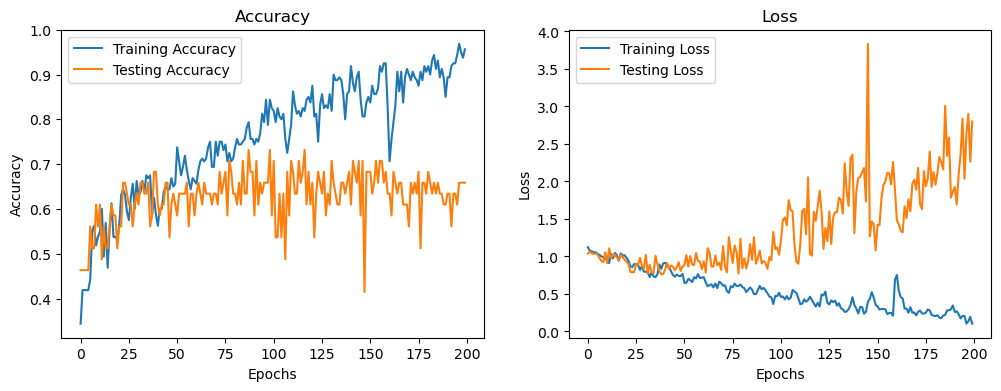

2/2 [==============================] - 0s 61ms/step - loss: 2.7993 - accuracy: 0.6585
Test Accuracy: 65.85%


In [28]:
import matplotlib.pyplot as plt

# Lấy giá trị accuracy và loss từ biến "history"
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']


# Vẽ biểu đồ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 56ms/step


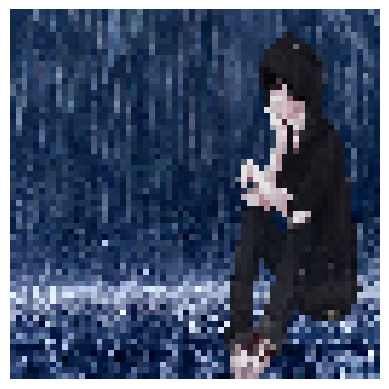

Tuong tu: 77.73%
That tinh: 22.27%
Dang yeu: 0.00%
Predicted class: Tuong tu


In [9]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh từ máy tính
image_path = "C:/Users/Admin/Pictures/demo1.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (64, 64))
preprocessed_image = resized_image / 255.0

# Chuyển đổi ảnh thành tensor
input_image = tf.convert_to_tensor(preprocessed_image, dtype=tf.float32)

# Dự đoán bằng mô hình đã huấn luyện
predictions = model.predict(tf.expand_dims(input_image, axis=0))

# Đưa ra kết quả
class_labels = ["Tuong tu", "That tinh", "Dang yeu"]
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Hiển thị ma trận ảnh
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Chuyển đổi màu từ BGR sang RGB
plt.axis('off')  # Ẩn trục
plt.show()

# Hiển thị xác suất cho từng nhãn
for i in range(len(class_labels)):
    probability = predictions[0][i] * 100
    print(f"{class_labels[i]}: {probability:.2f}%")

print(f"Predicted class: {predicted_class_label}")